<a href="https://colab.research.google.com/github/wambugudan/Data-Science-Projects/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px

%matplotlib inline

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read csv file from drive
weather = pd.read_csv('/content/drive/My Drive/weatherAUS.csv')

weather.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
# Getting Dataset details
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Dataset shape
weather.shape

(145460, 23)

In [ ]:
# Removing the rows with null RainToday and RainTomorrow
weather.dropna(subset = ['RainToday', 'RainTomorrow'], inplace=True)
weather.shape

(140787, 23)

## Exploring the data for insights

In [ ]:
# Customizing plot grid
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# Histogram comparing RainToday and Location
px.histogram(weather, x = 'Location',
             title = 'Location Vs RainToday',
             color = 'RainToday')

In [ ]:
# Creating a histogram to visualize Temp 3PM vs RainTomorrow

px.histogram(weather, x = 'Temp3pm',
             title = 'Temp at 3 PM Vs RainTomorrow',
             color = 'RainTomorrow')

In [ ]:
# Visualizing RainTomorrow Vs RainToday
px.histogram(weather, x = 'RainTomorrow',
             title = 'RainTomorrow Vs RainToday',
             color = 'RainToday')

In [ ]:
# Scatter plot to compare Temperature and RainToday
px.scatter(weather.sample(3000), x = 'MinTemp', y= 'MaxTemp',
           color = 'RainToday',
           title = 'Max & Min Temp Vs RainToday')

In [ ]:
px.strip(weather.sample(5000), x = 'Temp3pm',
         y = 'Humidity3pm', color = 'RainTomorrow',
         title = 'Temp 3 PM Vs Humidy 3 PM')

In [ ]:
#### Working with a sample of the dataset
use_sample = True
sample = 0.3

if use_sample:
  weather_sample = weather.sample(frac=sample).copy()

weather_sample.shape

(42236, 23)

### Splitting the dataset
##### There are 3 main split in an ML project:

*   Training Set - Used to train the model and adjust the model weights

*   Validation Set - Used to evaluate the model during training to tune model hyperparameters.

*   Test Set - Usually provided seperately in production level to test the model's accuracy,

In [ ]:
# Spliting the data to train, validate and test dataset

from sklearn.model_selection import train_test_split

# Spliting the test data
train_val, test_df = train_test_split(weather, test_size=0.2, random_state=42)

# spliting the validation and train dataset
train_df, validation_df = train_test_split(train_val, test_size=0.25, random_state = 42)

print('train shape ' , train_df.shape)

print('validation shape ' , validation_df.shape)

print('test shape ' , test_df.shape)

train shape  (84471, 23)
validation shape  (28158, 23)
test shape  (28158, 23)


### Handling Dates when spliting dataset to Train, Validate and Test datasets

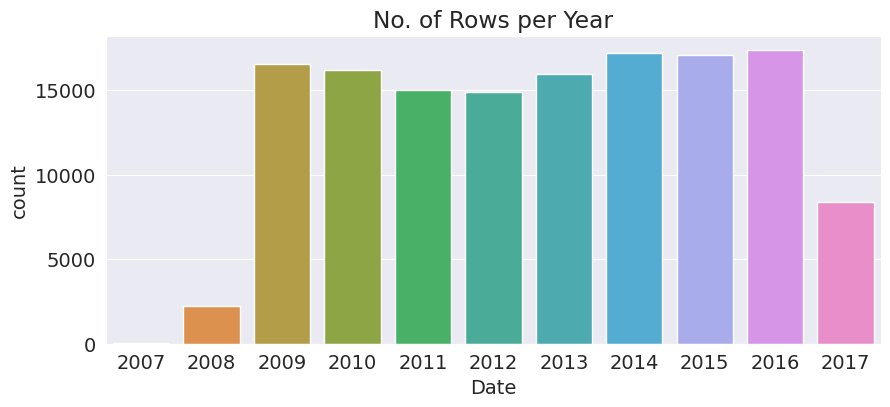

In [ ]:
# Visualizing the date year in the dataset
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(weather.Date).dt.year);

In [ ]:
# Creating a Train, Validate and Test dataset using Date aware option
# Creating variable year
year = pd.to_datetime(weather.Date).dt.year

#Splitting the data
train_df = weather[year < 2015]
val_df = weather[year == 2015]
test_df = weather[year >2015]

#Printing the shape
print('train shape ' , train_df.shape)
print('validation shape ' , val_df.shape)
print('test shape ' , test_df.shape)

train shape  (97988, 23)
validation shape  (17089, 23)
test shape  (25710, 23)


In [ ]:
# Create input and output column

input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'


In [ ]:
# Creating inputs and output datasets

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()



In [ ]:
# Creating a list of numerical and categorical columns

numerical_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()


In [ ]:
# Verify if all numerical columns are made of numbers
train_inputs[numerical_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [ ]:
# Verify the categorical columns
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

### Imputing missing values to allow for ML model to work correctly

In [ ]:
# Counting all missing values in the dataset columns

weather[numerical_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [ ]:
# Using SimpleImputer to populate missing values using the column mean as the startegy2

from sklearn.impute import SimpleImputer

# Instanciating the class SImpleIMputer
imputer = SimpleImputer(strategy='mean')

# Fitting the imputer to the data
imputer.fit(weather[numerical_cols])

# After the fitting a statistics is computed for every column
list(imputer.statistics_)


[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

In [ ]:
# Imputing the missing values

train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

train_inputs[numerical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Scaling Numeric Features

> Helps to ensure that the numerical columns does not have a disproportionate impact on the model's loss.






In [ ]:
# Previewing a statistical summary of the numerical columns
weather[numerical_cols].describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

In [ ]:
# Importing library to scale the numerical data
from sklearn.preprocessing import MinMaxScaler

# Instanciating the MInMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler to the data
scaler.fit(weather[numerical_cols])

# Printing the Min
list(scaler.data_min_)

# Printing the Max
#list(scaler.data_max_)

[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [ ]:
# Scaling all inputs datasets

train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [ ]:
# Preview the scaled train_inputs
train_inputs[numerical_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

## Encoding Categorical Data
Categorical data is converted to numberssince ML models can only be trained using numerical data.

one-hot encoding is the technique used to encode the data

In [ ]:
# Checking the unique values in all categorical columns
weather[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [ ]:
# Creating the one-hot key encoder
from sklearn.preprocessing import OneHotEncoder

#?OneHotEncoder

# Instanciating
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit enoder to data
encoder.fit(weather[categorical_cols])

# View encoded categories
encoder.categories_

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [ ]:
# Generate column names for for individual category using get_feature_name_out

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Print the generated column names
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [ ]:
# Adding the created columns to the input datasets

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-32-066b1abaed60>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-32-066b1abaed60>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-32-066b1abaed60>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-32-066b1abaed60>:3: PerformanceWarning:

Da

In [ ]:
# Previewing the new dataframe with the added columns

pd.set_option('display.max_columns', None)

test_inputs.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498   Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499   Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500   Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501   Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502   Albury  0.566038  0.523629  0.018329     0.037741  0.526244   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498         ENE       0.372093        NaN        ESE      0.000000   
2499         SSE       0.341085        SSE         SE      0.069231   
2500         ENE       0.325581        ESE        ENE      0.084615   
2501         SSE       0.255814         SE        SSE      0.069231   
2502         ENE       0.193798         SE        SSE      0.046154   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498      0.080460         0.46         0.17     0.543802       0.5136   
2499      0.195402         0.54         0.30     0.505785       0.5008   
2500      0.448276         0.62         0.67     0.553719       0.6032   
2501      0.195402         0.74         0.65     0.618182       0.6304   
2502      0.103448         0.92         0.63     0.591736       0.5888   

      Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498  0.777778  0.333333  0.702532  0.808061        No                0.0   
2499  0.888889  0.888889  0.675105  0.712092        No                0.0   
2500  0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501  0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502  0.888889  0.888889  0.514768  0.529750       Yes                0.0   

      Location_Albany  Location_Albury  Location_AliceSprings  \
2498              0.0              1.0                    0.0   
2499              0.0              1.0                    0.0   
2500              0.0              1.0                    0.0   
2501              0.0              1.0                    0.0   
2502              0.0              1.0                    0.0   

      Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
2498                     0.0                0.0               0.0   
2499                     0.0                0.0               0.0   
2500                     0.0                0.0               0.0   
2501                     0.0                0.0               0.0   
2502                     0.0                0.0               0.0   

      Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
2498                0.0              0.0                0.0             0.0   
2499                0.0              0.0                0.0             0.0   
2500                0.0              0.0                0.0             0.0   
2501                0.0              0.0                0.0             0.0   
2502                0.0              0.0                0.0             0.0   

      Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
2498                    0.0                0.0              0.0   
2499                    0.0                0.0              0.0   
2500                    0.0                0.0              0.0   
2501                    0.0                0.0              0.0   
2502                    0.0                0.0              0.0   

      Location_GoldCoast  Location_Hobart  Location_Katherine  \
2498                 0.0              0.0                 0.0   
2499                 0.0              0.0                 0.0   
2500                 0.0              0.0                 0.0   
2501                 0.0              0.0                 0.0   
2502                 0.0              0.0                 0.0   

      Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
2498                  0.0                 0.0                        0.0   
2499                  

## Saving processed data to disk
Helps to avoid running the entire Notebook everytime the model is run

In [ ]:
# Installing parquet library to help save the dataset
!pip install pyarrow --quiet

In [ ]:
# Saving the processed input datasets
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [ ]:
# Saving the targets
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

In [ ]:
# Reading data stored in parquet format
%%time
x = pd.read_parquet('train_inputs.parquet')

y = pd.read_parquet('train_targets.parquet')

x.head()

CPU times: user 169 ms, sys: 169 ms, total: 338 ms
Wall time: 265 ms


Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury  0.516509  0.523629  0.001617     0.037741  0.526244           W   
1   Albury  0.375000  0.565217  0.000000     0.037741  0.526244         WNW   
2   Albury  0.504717  0.576560  0.000000     0.037741  0.526244         WSW   
3   Albury  0.417453  0.620038  0.000000     0.037741  0.526244          NE   
4   Albury  0.613208  0.701323  0.002695     0.037741  0.526244           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       0.294574          W        WNW      0.153846      0.275862   
1       0.294574        NNW        WSW      0.030769      0.252874   
2       0.310078          W        WSW      0.146154      0.298851   
3       0.139535         SE          E      0.084615      0.103448   
4       0.271318        ENE         NW      0.053846      0.229885   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         0.71         0.22     0.449587       0.4800  0.888889  0.499917   
1         0.44         0.25     0.497521       0.4912  0.492351  0.499917   
2         0.38         0.30     0.447934       0.5056  0.492351  0.222222   
3         0.45         0.16     0.613223       0.5712  0.492351  0.499917   
4         0.82         0.33     0.500826       0.4624  0.777778  0.888889   

    Temp9am   Temp3pm RainToday  Location_Adelaide  Location_Albany  \
0  0.508439  0.522073        No                0.0              0.0   
1  0.514768  0.570058        No                0.0              0.0   
2  0.594937  0.548944        No                0.0              0.0   
3  0.533755  0.612284        No                0.0              0.0   
4  0.527426  0.673704        No                0.0              0.0   

   Location_Albury  Location_AliceSprings  Location_BadgerysCreek  \
0              1.0                    0.0                     0.0   
1              1.0                    0.0                     0.0   
2              1.0                    0.0                     0.0   
3              1.0                    0.0                     0.0   
4              1.0                    0.0                     0.0   

   Location_Ballarat  Location_Bendigo  Location_Brisbane  Location_Cairns  \
0                0.0               0.0                0.0              0.0   
1                0.0               0.0                0.0              0.0   
2                0.0               0.0                0.0              0.0   
3                0.0               0.0                0.0              0.0   
4                0.0               0.0                0.0              0.0   

   Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
0                0.0             0.0                    0.0   
1                0.0             0.0                    0.0   
2                0.0             0.0                    0.0   
3                0.0             0.0                    0.0   
4                0.0             0.0                    0.0   

   Location_Dartmoor  Location_Darwin  Location_GoldCoast  Location_Hobart  \
0                0.0              0.0                 0.0              0.0   
1                0.0              0.0                 0.0              0.0   
2                0.0              0.0                 0.0              0.0   
3                0.0              0.0                 0.0              0.0   
4                0.0              0.0                 0.0              0.0   

   Location_Katherine  Location_Launceston  Location_Melbourne  \
0                 0.0                  0.0                 0.0   
1                 0.0                  0.0                 0.0   
2                 0.0                  0.0                 0.0   
3                 0.0                  0.0                 0.0   
4                 0.0                  0.0                 0.0   

   Location_MelbourneAirport  Location_Mildura  Location_Moree  \
0                    

# Logistic Regression
Used to solve binary classification problems. it entails:
> Taking weighted sum of input features.
> Applying the sigmoid function to give a number between 0 and 1.
> the closer the output is to 1 then it indicated the probability of 'yes'.
> the use of cross entropyloss function to evaluate the model result.

In [ ]:
# Importing libraries

from sklearn.linear_model import  LogisticRegression

#?LogisticRegression

# Creating an instance of the model

model = LogisticRegression(solver = 'liblinear')

# Training the model
model.fit(train_inputs[numerical_cols + encoded_cols], train_targets)


LogisticRegression(solver='liblinear')

In [ ]:
# Print the weights assigned to every column by the model
#print(model.coef_.tolist())

weights_df = pd.DataFrame({
    'feature': (numerical_cols + encoded_cols),
    'Weight': model.coef_.tolist()[0]
})

<Axes: xlabel='Weight', ylabel='feature'>

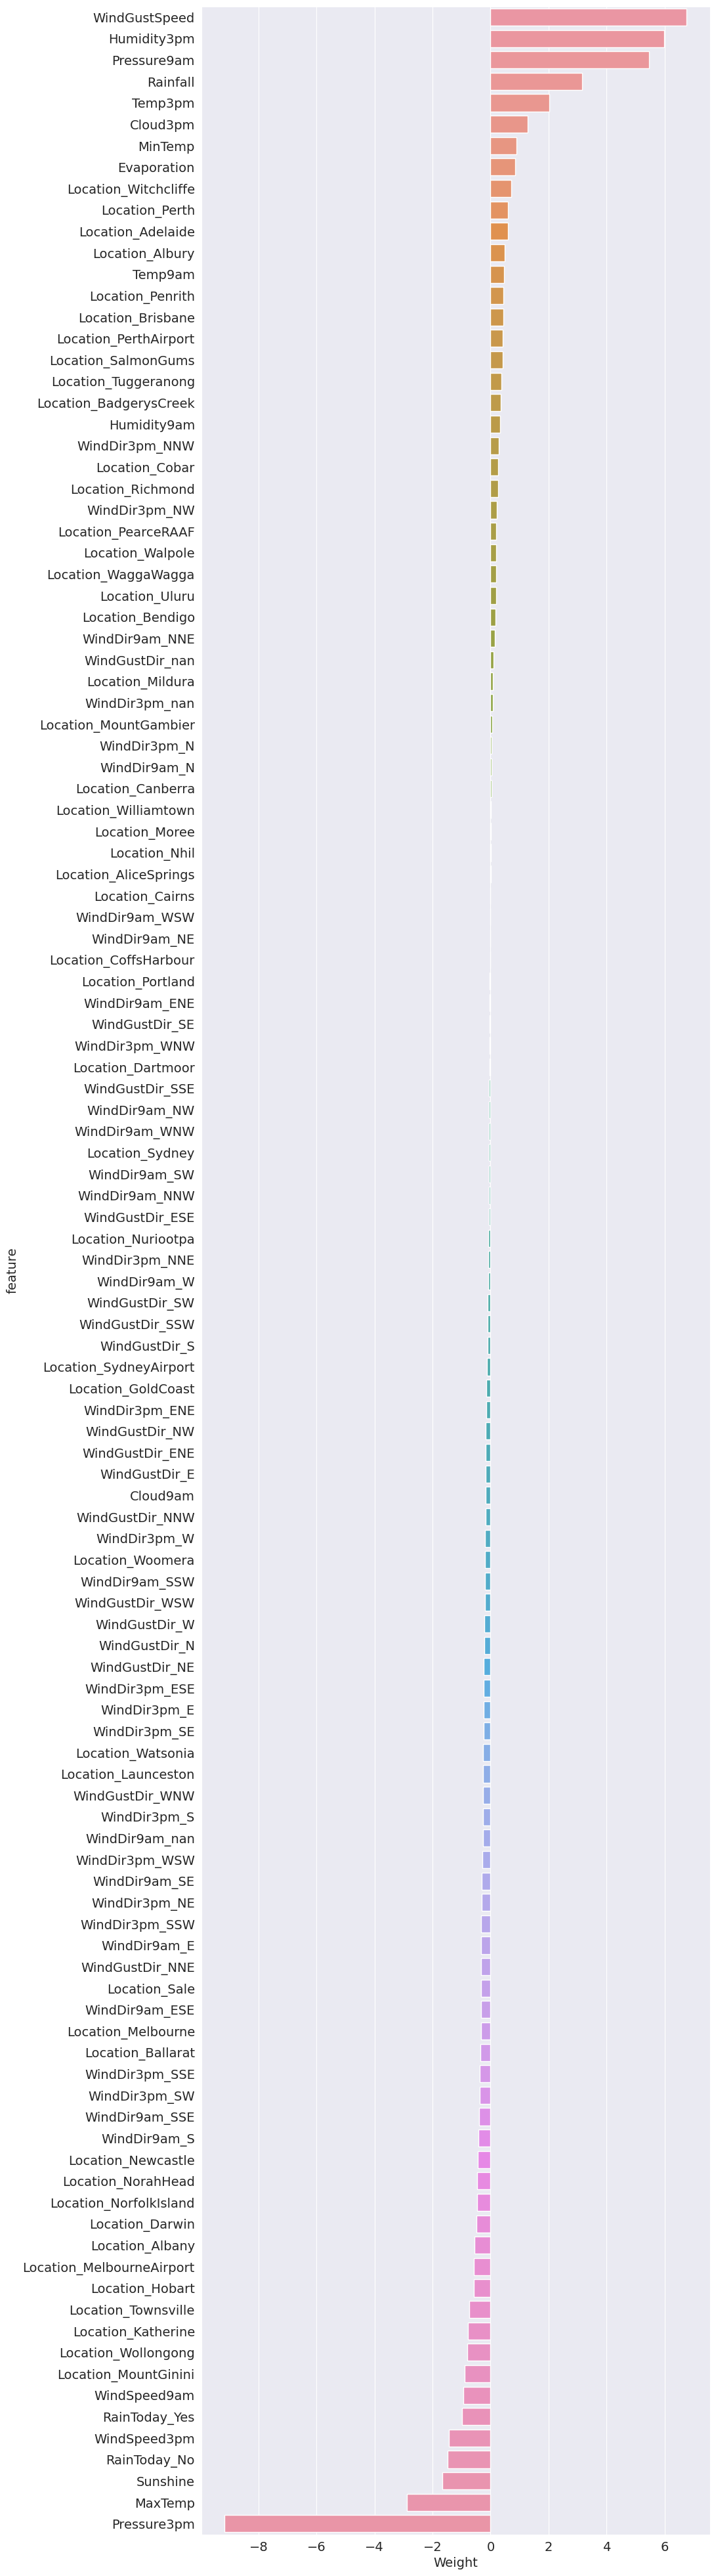

In [ ]:
# Visualizing the weights
plt.figure(figsize = (10, 50))

sns.barplot(data = weights_df.sort_values(by='Weight', ascending = False), x = 'Weight', y='feature')

In [ ]:
# The model intercept

print(model.intercept_)

[-2.44956109]


## Evaluating the model using

In [ ]:
# Ceating a unified variable

x_train = train_inputs[numerical_cols + encoded_cols]
x_val = val_inputs[numerical_cols + encoded_cols]
x_test = test_inputs[numerical_cols + encoded_cols]

In [ ]:
# Using model to predict

train_predictions = model.predict(x_train)

train_predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### To compute accuracy of the model, we compare the train predicted verses tarin targets.
> This is achieved using the accuracy_score function from sklearn.metrics

In [ ]:
# importing the acuracy score library
from sklearn.metrics import accuracy_score

# Testing for accuracy
accuracy_score(train_targets, train_predictions)

0.8519206433440829

In [ ]:
# Displaying the probability prediction using predict_proba

train_probabilities = model.predict_proba(x_train)
train_probabilities

array([[0.94401311, 0.05598689],
       [0.94074304, 0.05925696],
       [0.96093735, 0.03906265],
       ...,
       [0.98749147, 0.01250853],
       [0.98334725, 0.01665275],
       [0.87453712, 0.12546288]])

In [ ]:
# Printing the model target calsses
model.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
# Visualizing the model accuracy using the confusion matrix

# Importing the confusion matrix from sklearn.metrics

from sklearn.metrics import confusion_matrix

# Creating the confusion matrics

confusion_matrix(train_targets, train_predictions, normalize = 'true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [ ]:
# Visualizing the confusion matrix
 # Create a function
def predict_and_plot (inputs, targets, name=''):
  predictions = model.predict(inputs)

  accuracy = accuracy_score(targets, predictions)
  print("Accuracy: {:.2f}%".format(accuracy*100))

  cf = confusion_matrix(targets, predictions, normalize = 'true')
  plt.figure()
  sns.heatmap(cf, annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name))

  return predictions


Accuracy: 85.19%


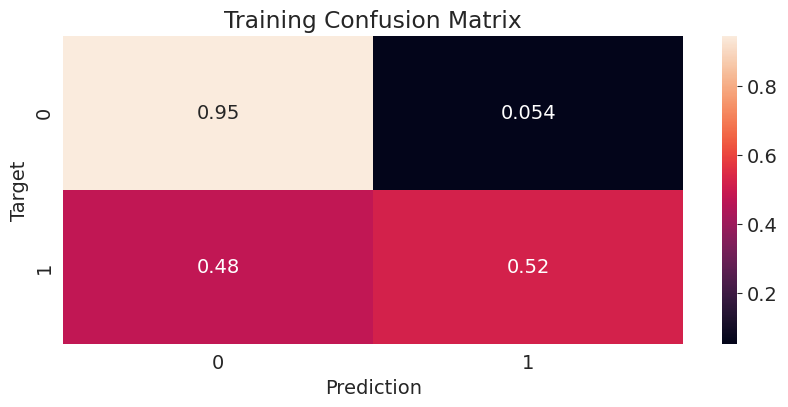

In [ ]:
# Running predictions on the training dataset
train_preds = predict_and_plot(x_train, train_targets, 'Training')

Accuracy: 85.40%


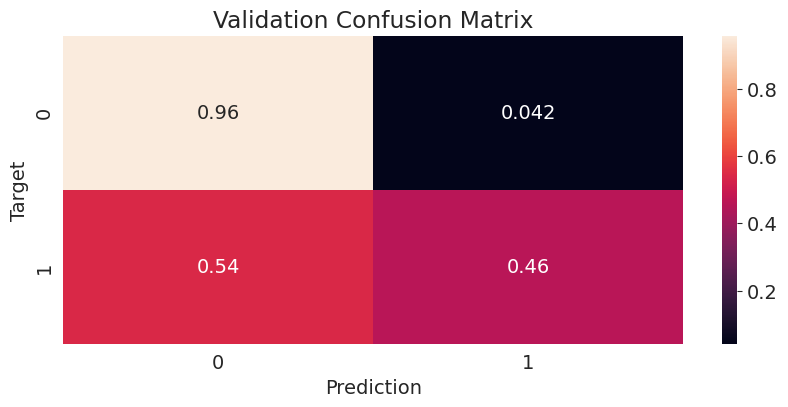

In [ ]:
# Computing models accuracy on validation datset
val_preds = predict_and_plot(x_val, val_targets, 'Validation')

Accuracy: 84.20%


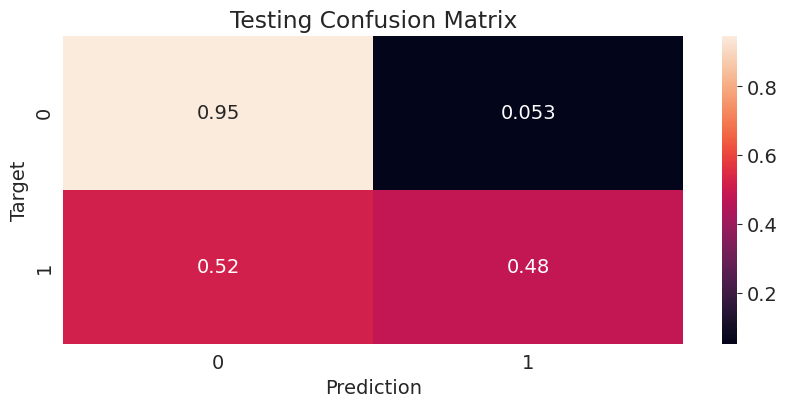

In [ ]:
# Computing the model accuracy on test dataset
test_preds = predict_and_plot(x_test, test_targets, 'Testing')

In [ ]:
#Analyzing model aganist dumb data
# Creating a function that randomly creates yes/no enries

def random_guess(inputs):
  return np.random.choice(["No", "Yes"], len(inputs))

# Creating a function that always guesses No
def all_no(inputs):
  return np.full(len(inputs), "No")

In [ ]:
# Checking the model accuracy using the randomly guessed data
accuracy_score(test_targets, random_guess(x_test))

0.503461688059121

In [ ]:
# Checking model accuracy using all no data
accuracy_score(test_targets, all_no(x_test))

0.7734344612991054

## Making Prediction on a Single Input


In [ ]:
# Creating a new Single Input

new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'
             }

In [ ]:
# Converting the new input dictionary into a pandas Dataframe
new_input_df = pd.DataFrame([new_input])

#Previewing the dataframe
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

To predict the RainTomorrow field for the new input, we must apply the same transformation applied while training the mode. They include:


1.   Imputing of missing values using the `imputer`
2.   Scaling the Numerical features using the `scaler`
3.   Encoding categorical features using `encoder`








In [ ]:
# Performing the transformation
new_input_df[numerical_cols] = imputer.transform(new_input_df[numerical_cols])
new_input_df[numerical_cols] = scaler.transform(new_input_df[numerical_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

<ipython-input-57-bc53adb1923a>:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-57-bc53adb1923a>:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-57-bc53adb1923a>:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-57-bc53adb1923a>:4: PerformanceWarning:

Da

In [ ]:
# Previewing the transformed new input dataframe
new_input_df

Date   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine  0.747642  0.718336  0.027493     0.028966  0.526244   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW       0.356589         NW        NNE           0.1   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0      0.229885         0.89         0.58     0.401653       0.3904  0.888889   

   Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  Location_Albany  \
0  0.555556  0.694093  0.737044       Yes                0.0              0.0   

   Location_Albury  Location_AliceSprings  Location_BadgerysCreek  \
0              0.0                    0.0                     0.0   

   Location_Ballarat  Location_Bendigo  Location_Brisbane  Location_Cairns  \
0                0.0               0.0                0.0              0.0   

   Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
0                0.0             0.0                    0.0   

   Location_Dartmoor  Location_Darwin  Location_GoldCoast  Location_Hobart  \
0                0.0              0.0                 0.0              0.0   

   Location_Katherine  Location_Launceston  Location_Melbourne  \
0                 1.0                  0.0                 0.0   

   Location_MelbourneAirport  Location_Mildura  Location_Moree  \
0                        0.0               0.0             0.0   

   Location_MountGambier  Location_MountGinini  Location_Newcastle  \
0                    0.0                   0.0                 0.0   

   Location_Nhil  Location_NorahHead  Location_NorfolkIsland  \
0            0.0                 0.0                     0.0   

   Location_Nuriootpa  Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                 0.0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDi

In [ ]:
# Creating a merged dataframe for the new transformation
x_new_input = new_input_df[numerical_cols + encoded_cols]
x_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.1      0.229885         0.89         0.58     0.401653   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  \
0       0.3904  0.888889  0.555556  0.694093  0.737044                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0           0.0           

In [ ]:
# making predictions of the RainTomorrow using the model on the new input
prediction = model.predict(x_new_input)

# Printing the predited value
prediction

array(['Yes'], dtype=object)

In [ ]:
# Printing the probability by which the prediction was done
probability = model.predict_proba(x_new_input)[0]

# Printing the probability
probability

array([0.48103629, 0.51896371])

In [ ]:
# Crreating a function to make predictions for individual inputs

def predict_input(single_input):
  input_df = pd.DataFrame([single_input])
  input_df[numerical_cols] = imputer.transform(input_df[numerical_cols])
  input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  x_input = input_df[numerical_cols + encoded_cols]
  pred = model.predict(x_input)[0]
  prob = model.predict_proba(x_input)[0][list(model.classes_).index(pred)]
  return pred, prob


In [ ]:
# Creating a dictionary of data to be predicted

new_input2 = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [ ]:
# Making the prediction using the created function
predict_input(new_input)

<ipython-input-62-69c4cbafd208>:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-62-69c4cbafd208>:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-62-69c4cbafd208>:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-62-69c4cbafd208>:7: PerformanceWarning:

Da

('Yes', 0.5189637106904185)